In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Part3 - vehicle.csv")

In [4]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nUnique values: \n", df.nunique())

In [5]:
explore(df)

 HEAD
    compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0     

From the above results we can say that there are missing values. Also Outliers are present in Radius ratio, pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio

In [6]:
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

Almost all the columns have missing values. Lets impute them using KNN imputer. Before that change the class values.

In [7]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [8]:
cleanup_nums = {"class": {"van": 0, "car": 1,"bus": 2}}

In [9]:
df = df.replace(cleanup_nums)
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      0  
1             189.0            199      0  
2             188.0            196      1  
3             199.0            207      0  
4             180.0            183      2

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
impute_KNN=imputer.fit_transform(df)
df_new = pd.DataFrame(impute_KNN, columns = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class'])
df_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    0.0  
1             189.0          199.0    0.0  
2             188.0          196.0    1.0  
3             199.0          207.0    0.0  
4             180.0          183.0    2.0

In [11]:
df_new.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

Now that all the missing values are replaced lets do some analysis

Text(0.5, 1.0, 'Box Plot')

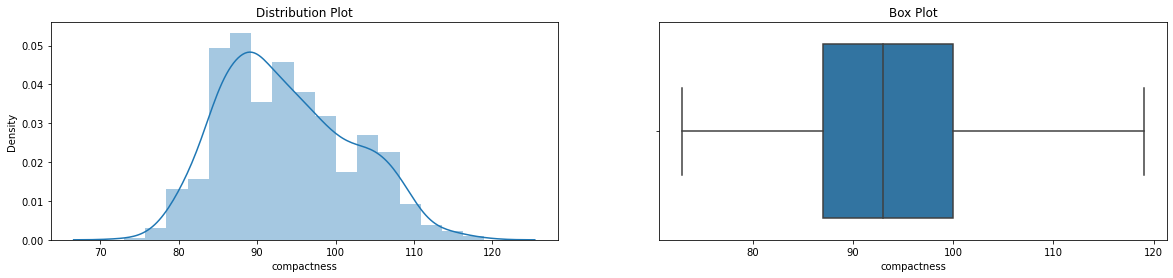

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['compactness'],ax=ax2)
ax2.set_title("Box Plot")

Compactness doesnt have any outliers and is normally distributed

Text(0.5, 1.0, 'Box Plot')

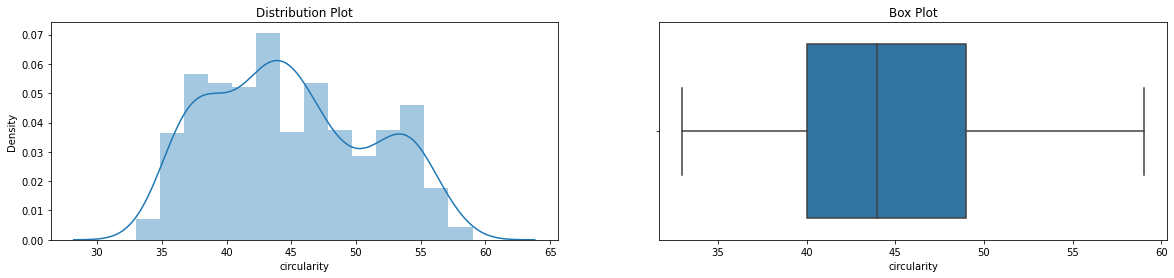

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['circularity'],ax=ax2)
ax2.set_title("Box Plot")

Circularity of vehicle doesnt have any outliers and its normally distributed but it has 2 peaks

Text(0.5, 1.0, 'Box Plot')

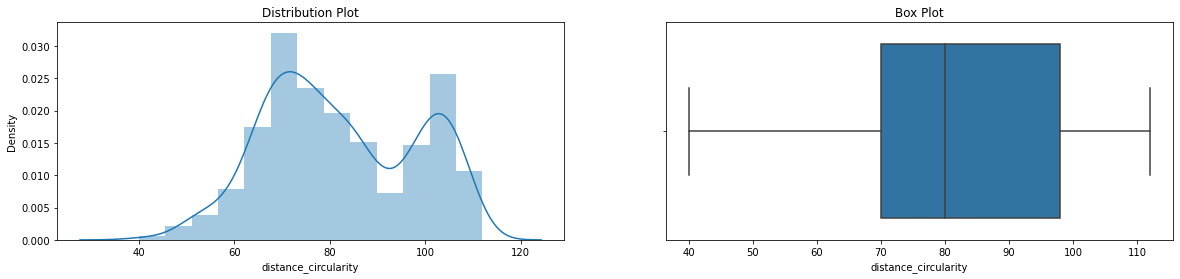

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the left side

Text(0.5, 1.0, 'Box Plot')

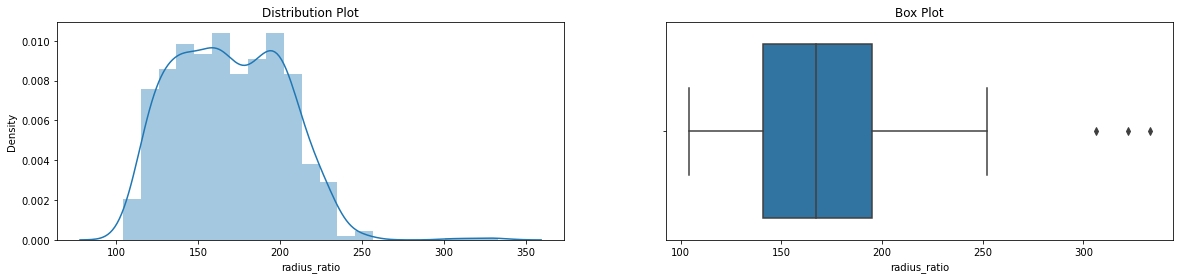

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

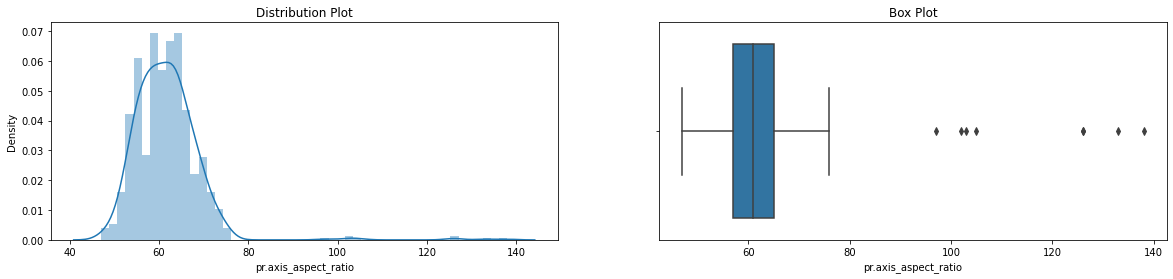

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail till 140 is at right side

Text(0.5, 1.0, 'Box Plot')

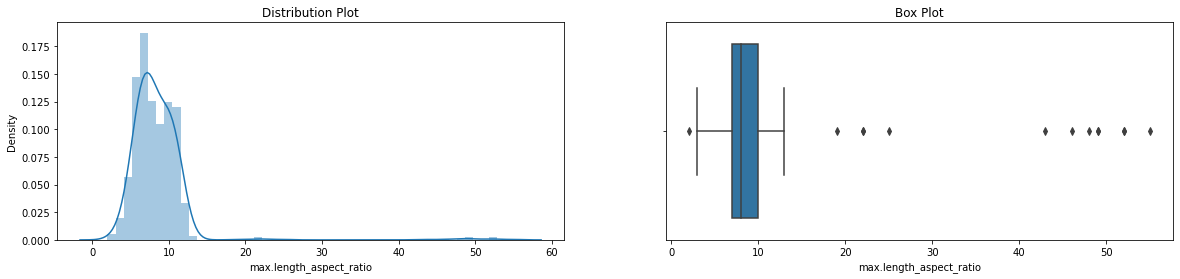

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

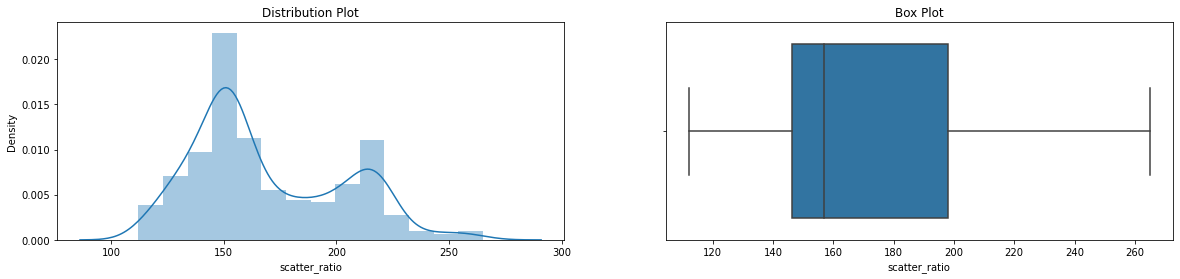

In [18]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

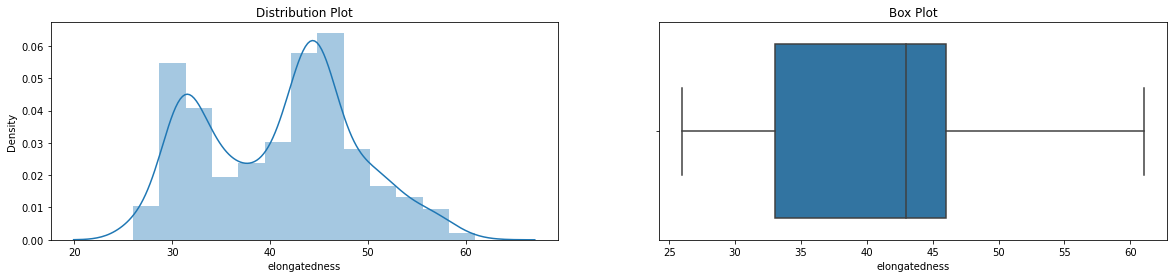

In [19]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is right skewness

Text(0.5, 1.0, 'Box Plot')

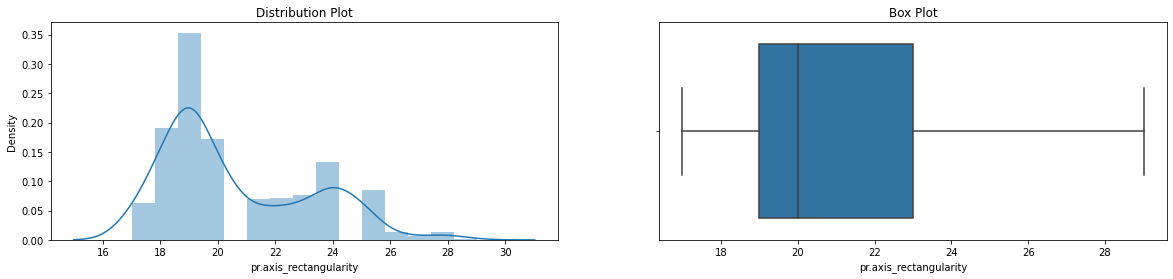

In [20]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

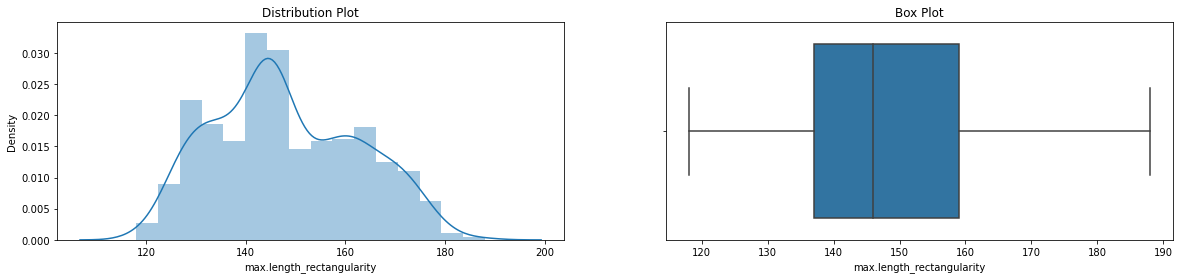

In [21]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

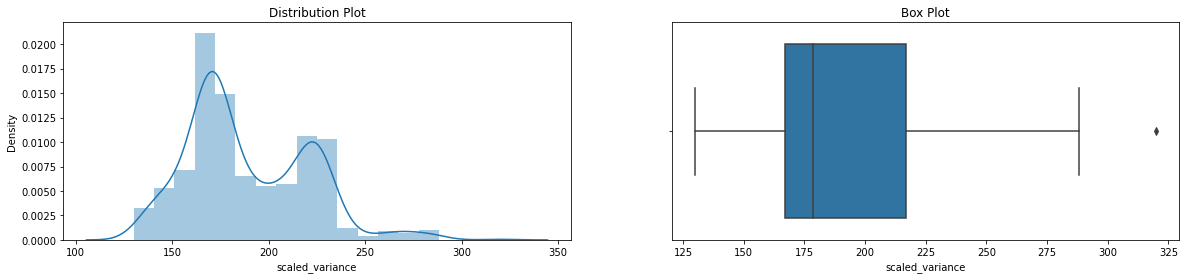

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

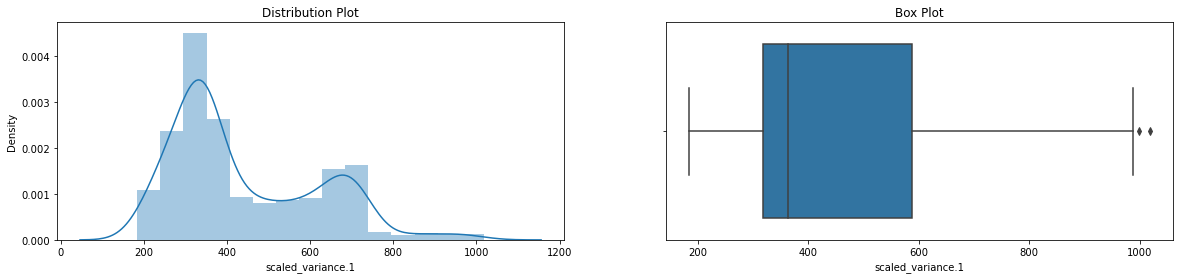

In [23]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

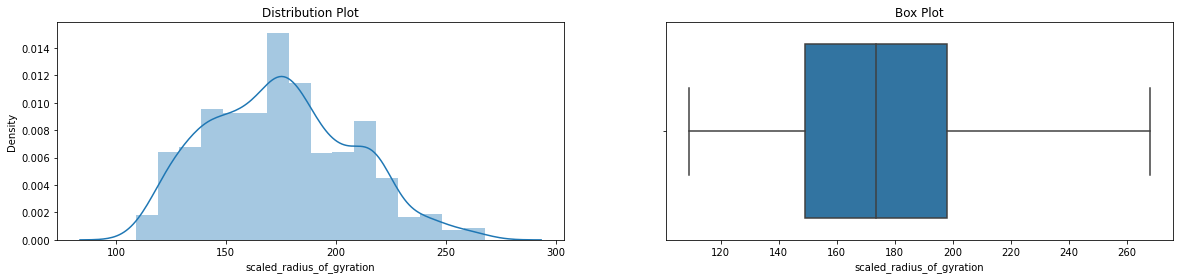

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

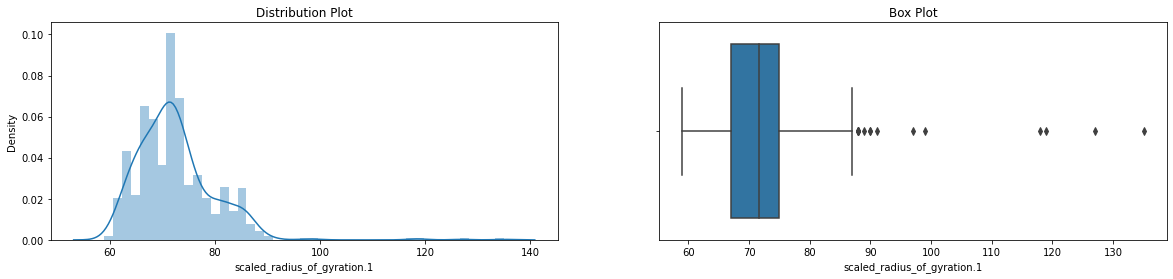

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

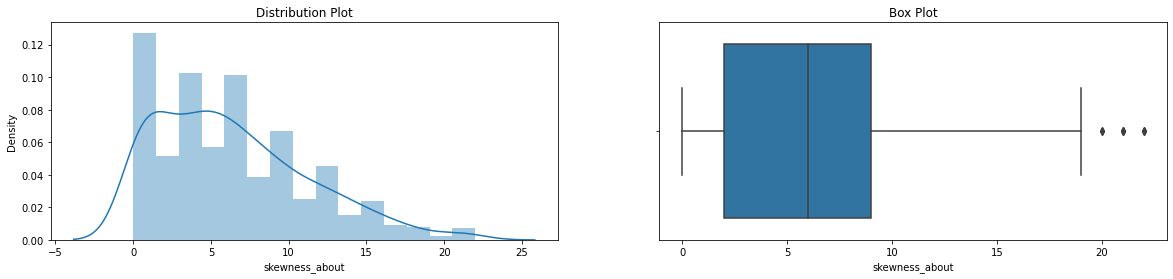

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

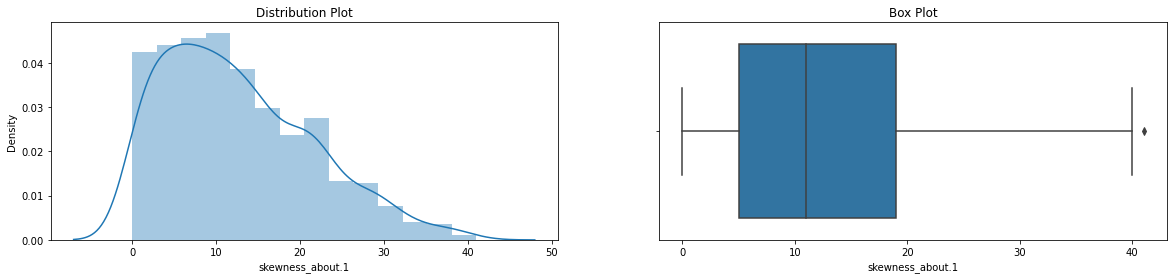

In [27]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side

Text(0.5, 1.0, 'Box Plot')

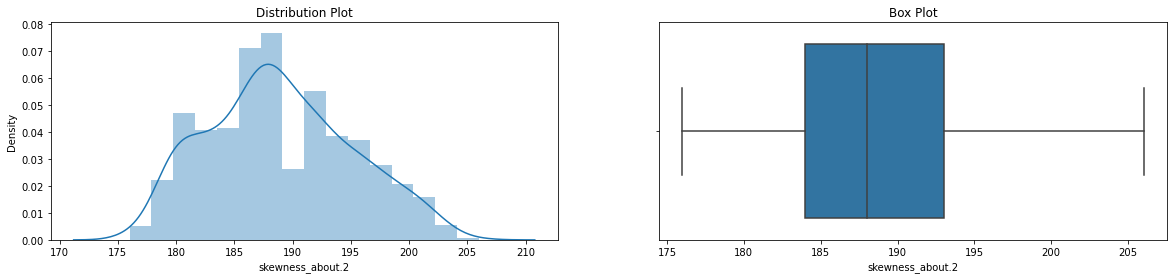

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side

Text(0.5, 1.0, 'Box Plot')

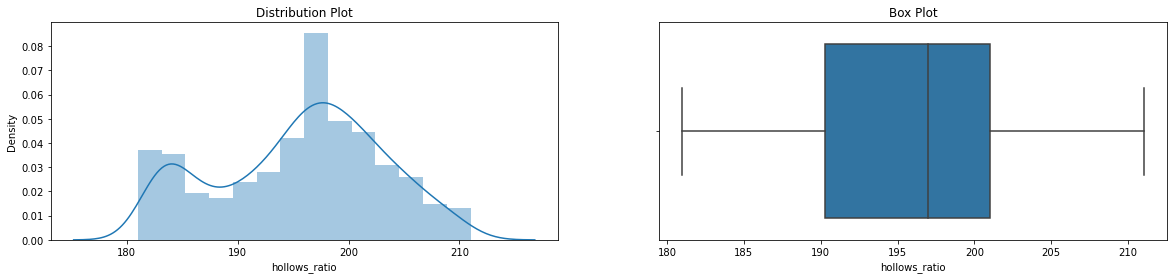

In [29]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_new['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_new['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side

In [30]:
df_new['class'].value_counts()

1.0    429
2.0    218
0.0    199
Name: class, dtype: int64

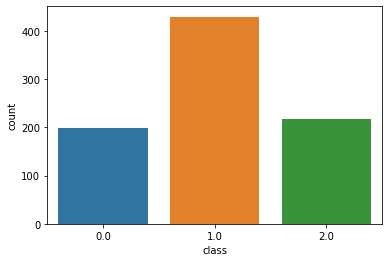

In [31]:
sns.countplot(df_new['class'])
plt.show()

In [32]:
cols=['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']
index=0
for i in range(len(cols)):
    q1 = np.quantile(df_new[cols[index]],0.25)
    q2 = np.quantile(df_new[cols[index]],0.50)
    q3 = np.quantile(df_new[cols[index]],0.75)
    IQR = q3-q1
    print("Quartie1::",q1)
    print("Quartie2::",q2)
    print("Quartie3::",q3)
    print("Inter Quartie Range::",IQR)
    #outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
    max=df_new[cols[index]].quantile(0.75)+(1.5 * IQR)
    print("skewness above",df_new[cols[index]].quantile(0.75)+(1.5 * IQR),"are outliers")
    print("The Outliers in",cols[index], "column are",df_new[df_new[cols[index]]>max].shape[0])
    df_new.drop(df_new[df_new[cols[index]]>max].index,axis=0,inplace=True)
    index=index+1
    print("-------------------------------------------------------------------------------------------------")

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
skewness above 276.0 are outliers
The Outliers in radius_ratio column are 3
-------------------------------------------------------------------------------------------------
Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
skewness above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 5
-------------------------------------------------------------------------------------------------
Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
skewness above 14.5 are outliers
The Outliers in max.length_aspect_ratio column are 4
-------------------------------------------------------------------------------------------------
Quartie1:: 167.0
Quartie2:: 178.0
Quartie3:: 216.0
Inter Quartie Range:: 49.0
skewness above 289.5 are outliers
The Outliers in scaled_variance column are 0
--------------------------------------------------------------------------------

From the above code we are able to know how many outliers are available in each column.Dropped all those outliers as we are going to apply SVM model and it is affected by outliers we are dropping them.

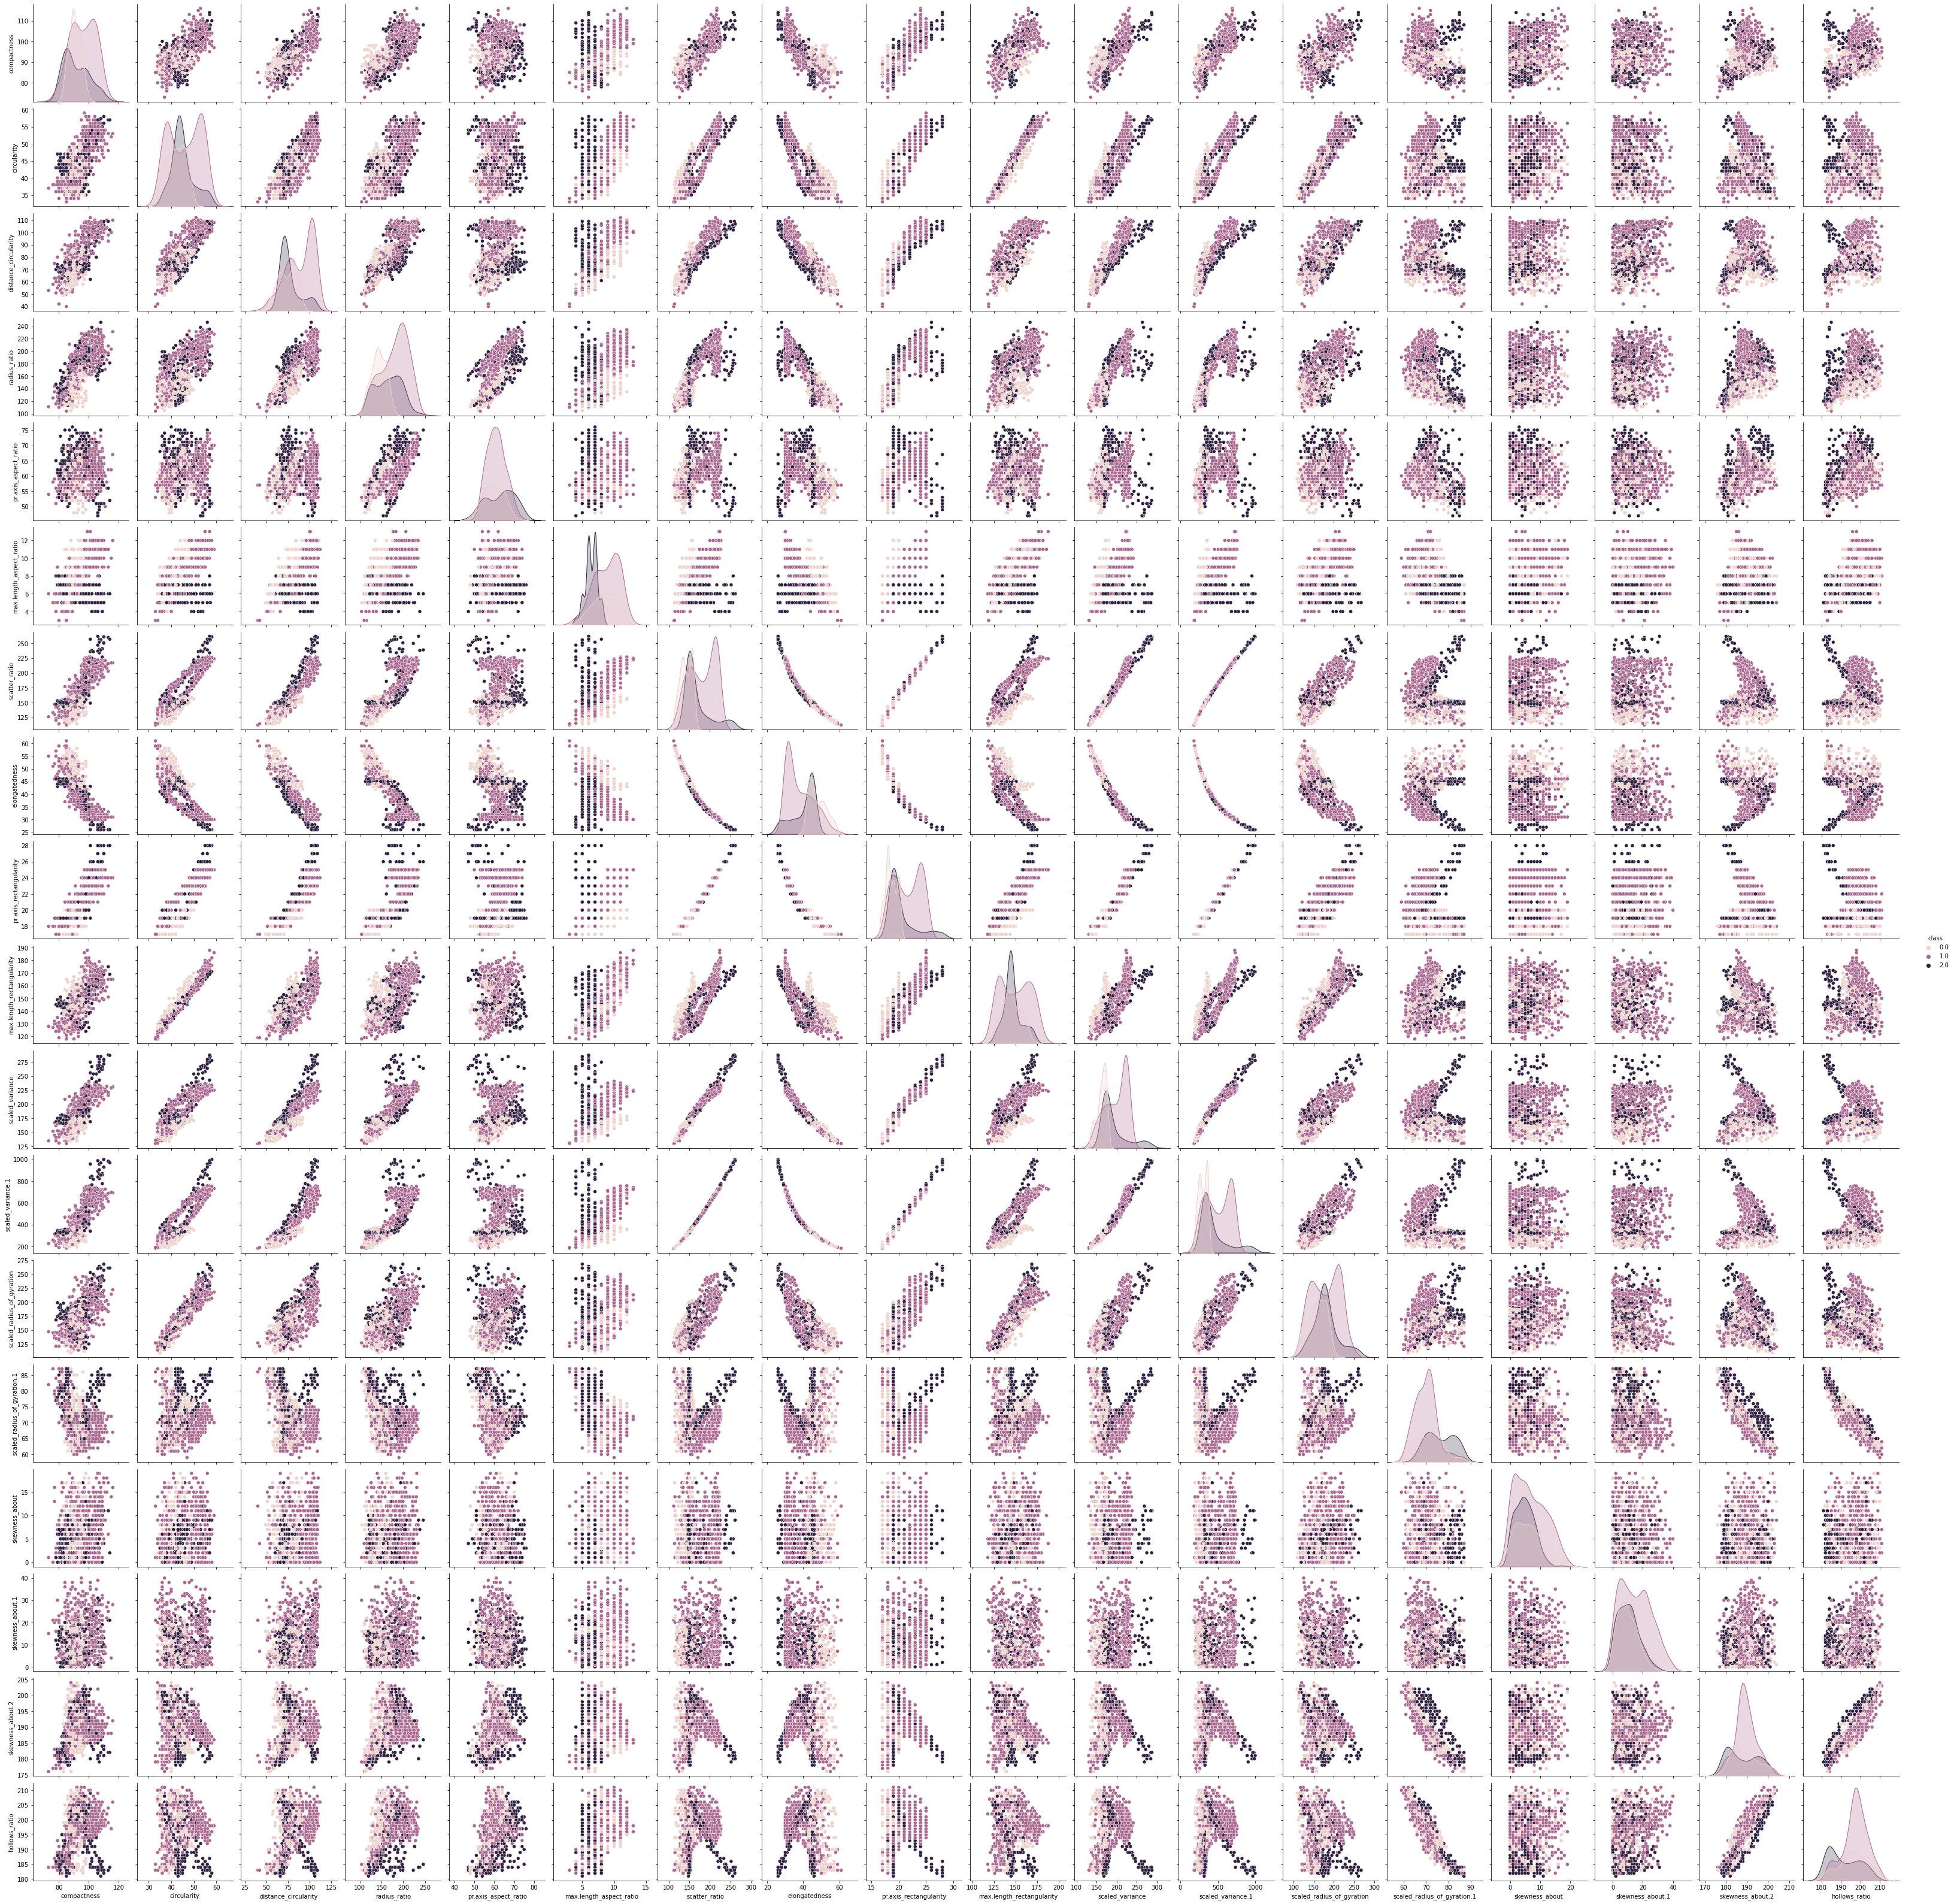

In [33]:
sns.pairplot(df_new,hue='class', diag_kind='kde')

Above plot also shows that there are many graphs that are long taoled which indicated the precense of outliers. Lets check the heat map also once

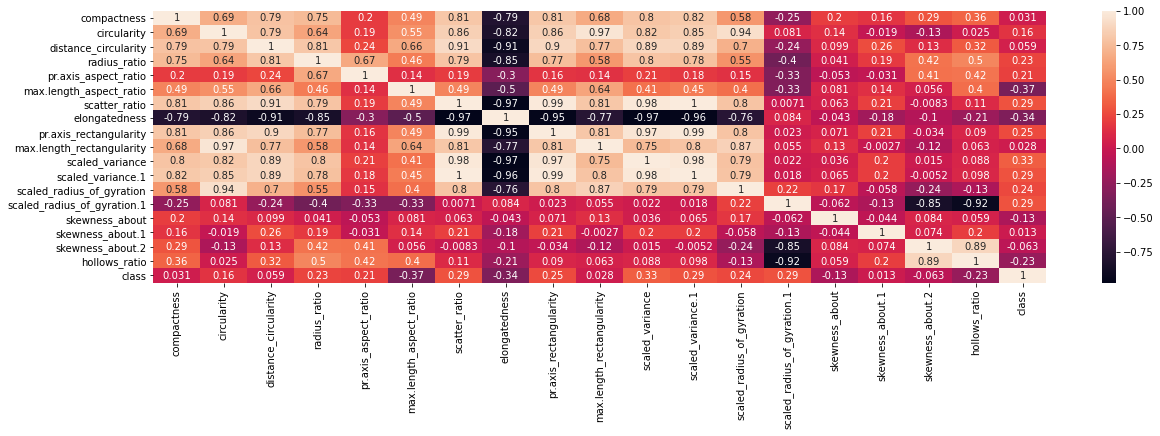

In [34]:
plt.figure(figsize=(20,5))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

We have many features that are having corelation more than + or - 0.9, eg:scatter ratio and scaled variance has 1, there are many features as such. We can either drop them or do PCA

# Lets do PCA

In [35]:
df_X=df_new.drop('class',axis=1)
df_Y=df_new['class']
print("new data frame share without dependent feature:",df_X.shape)
print("new data frame share with dependent feature:",df_Y.shape)

new data frame share without dependent feature: (814, 18)
new data frame share with dependent feature: (814,)


In [36]:
from scipy.stats import zscore
df_X_scaled = df_X.apply(zscore)

In [37]:
cov_matrix = np.cov(df_X_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123001  0.69038827  0.79120263  0.74779669  0.19732606  0.49409728
   0.81326605 -0.79043398  0.81359472  0.67620788  0.7960982   0.8192238
   0.58090357 -0.25204151  0.20033579  0.16049883  0.29110239  0.35826024]
 [ 0.69038827  1.00123001  0.79511608  0.64354959  0.19371173  0.55179383
   0.85886727 -0.82532718  0.85746806  0.96696525  0.81836451  0.85198374
   0.93751936  0.08106133  0.14193237 -0.01896264 -0.12819261  0.02547595]
 [ 0.79120263  0.79511608  1.00123001  0.81474728  0.24446379  0.66435812
   0.90936455 -0.91170892  0.89862545  0.7706847   0.88878346  0.89305715
   0.70458788 -0.23942176  0.0990797   0.26210176  0.1283866   0.31899411]
 [ 0.74779669  0.64354959  0.81474728  1.00123001  0.66662126  0.45812357
   0.79305655 -0.84791374  0.76620581  0.57966232  0.79637596  0.78258353
   0.55393605 -0.40251356  0.04087014  0.1883574   0.41641135  0.50053169]
 [ 0.19732606  0.19371173  0.24446379  0.66662126  1.00123001  0

In [38]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(df_X_scaled)

PCA(n_components=18)

In [39]:
pca_to_learn_variance.explained_variance_ratio_

array([5.44689762e-01, 1.88708345e-01, 6.67691057e-02, 6.30811863e-02,
       4.97938951e-02, 3.65220827e-02, 1.77148830e-02, 1.24744871e-02,
       6.09216880e-03, 4.12539364e-03, 3.23936946e-03, 2.23176907e-03,
       1.52047592e-03, 1.18213712e-03, 8.46994267e-04, 6.56534218e-04,
       3.31936502e-04, 1.94744189e-05])

In [40]:
pca_to_learn_variance.explained_variance_

array([9.81647526e+00, 3.40092825e+00, 1.20332219e+00, 1.13685798e+00,
       8.97392560e-01, 6.58206096e-01, 3.19260106e-01, 2.24816956e-01,
       1.09793920e-01, 7.43484226e-02, 5.83803706e-02, 4.02212551e-02,
       2.74022303e-02, 2.13046410e-02, 1.52646494e-02, 1.18321517e-02,
       5.98220619e-03, 3.50970709e-04])

In [41]:
pca_to_learn_variance.components_

array([[ 2.72164047e-01,  2.87563435e-01,  3.01493950e-01,
         2.72289505e-01,  9.63201752e-02,  1.92280415e-01,
         3.10749614e-01, -3.08204261e-01,  3.07860586e-01,
         2.76322921e-01,  3.03289291e-01,  3.07952666e-01,
         2.62073922e-01, -4.13822674e-02,  3.63533053e-02,
         5.79796225e-02,  3.20614050e-02,  7.95688533e-02],
       [-9.03211524e-02,  1.36657603e-01, -4.79104981e-02,
        -2.05384900e-01, -2.60743616e-01, -9.92798214e-02,
         7.05437268e-02, -9.38529871e-03,  8.34800618e-02,
         1.22432540e-01,  6.94724063e-02,  7.56184589e-02,
         2.07457345e-01,  5.03842561e-01, -1.51362310e-02,
        -9.41725579e-02, -5.00801949e-01, -5.06439473e-01],
       [-2.10674922e-02, -2.05631155e-01,  7.31724766e-02,
         3.38274265e-02, -1.32405135e-01, -1.25404462e-01,
         1.10225521e-01, -8.82673437e-02,  1.09414027e-01,
        -2.14964445e-01,  1.38027166e-01,  1.12623125e-01,
        -2.14280394e-01,  6.36454697e-02, -5.12057691e

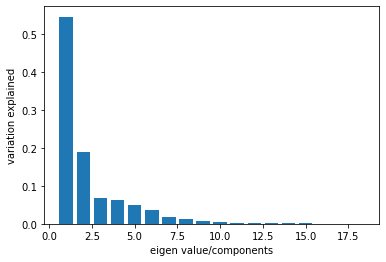

In [42]:
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

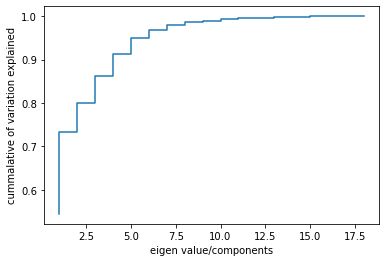

In [43]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

After seeing both the graphs we can bring down the components to 8 as the graph gets straight from there

In [44]:
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(df_X_scaled)

PCA(n_components=8)

In [45]:
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(df_X_scaled)
new_vehicle_df_pca_independent_attr.shape

(814, 8)

In [46]:
new_vehicle_df_dependent_attr=df_Y

In [47]:
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(df_X_scaled,df_Y,test_size=0.30,random_state=1)
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(new_vehicle_df_pca_independent_attr,new_vehicle_df_dependent_attr,test_size=0.30,random_state=1)

In [48]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of rawdata_X_train (569, 18)
shape of rawdata_y_train (569,)
shape of rawdata_X_test (245, 18)
shape of rawdata_y_test (245,)
--------------------------------------------
shape of pca_X_train (569, 8)
shape of pca_y_train (569,)
shape of pca_X_test (245, 8)
shape of pca_y_test (245,)


In [49]:
svc = SVC() 
svc.fit(rawdata_X_train,rawdata_y_train)

SVC()

In [50]:
rawdata_y_predict = svc.predict(rawdata_X_test)

In [51]:
svc.fit(pca_X_train,pca_y_train)

SVC()

In [52]:
pca_y_predict = svc.predict(pca_X_test)

In [53]:
print("Accuracy score with raw data(18 dimension)",accuracy_score(rawdata_y_test,rawdata_y_predict))
print("Accuracy score with pca data(8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Accuracy score with raw data(18 dimension) 0.9755102040816327
Accuracy score with pca data(8 dimension) 0.9591836734693877


In [54]:
print("Confusion matrix with raw data(18 dimension)\n",confusion_matrix(rawdata_y_test,rawdata_y_predict))
print("Confusion matrix with pca data(8 dimension)\n",confusion_matrix(pca_y_test,pca_y_predict))

Confusion matrix with raw data(18 dimension)
 [[ 49   1   0]
 [  2 115   2]
 [  1   0  75]]
Confusion matrix with pca data(8 dimension)
 [[ 47   2   1]
 [  2 115   2]
 [  1   2  73]]


From the abpve accuracy we can say that there is no much difference between the accuracy when calculated with 18 components and 8 components. So its better we decrease them to 8.

PCA summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed. Process time is also less.

Basically by doing PCA we reduced dimensions from 18 to 8 with just a minimal derease of 2%. Also decreasing the dimentions helps in easy visualization and easy computation.